In [ ]:
#Installation des dépendances
!pip install pandas
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Lecture des fichiers
fichier_2024 = pd.read_csv('/content/Test_Sanoia/NB_2024_cip13_age_sexe_reg_spe.CSV', sep=';', encoding='latin-1')
fichier_2023 = pd.read_csv('/content/Test_Sanoia/NB_2023_cip13_age_sexe_reg_spe.CSV', sep=';', encoding='latin-1')
fichier_2022 = pd.read_csv('/content/Test_Sanoia/NB_2022_cip13_age_sexe_reg_spe.CSV', sep=';', encoding='latin-1')

#Ajouter une colonne 'Annee' à chaque base
fichier_2024['Annee'] = 2024
fichier_2023['Annee'] = 2023
fichier_2022['Annee'] = 2022

#Concatener les bases
fichier_total = pd.concat([fichier_2024, fichier_2023, fichier_2022], ignore_index=True)



In [ ]:
#Connexion à une base sqlite temporaire
base_total = sqlite3.connect(":memory:")


#Chargement du dataframe dans une base nommée base_total
fichier_total.to_sql("fichier_total", base_total, if_exists="replace", index=False)

   Annee  nb_cip13
0   2024       978
1   2023      1015
2   2022      1031


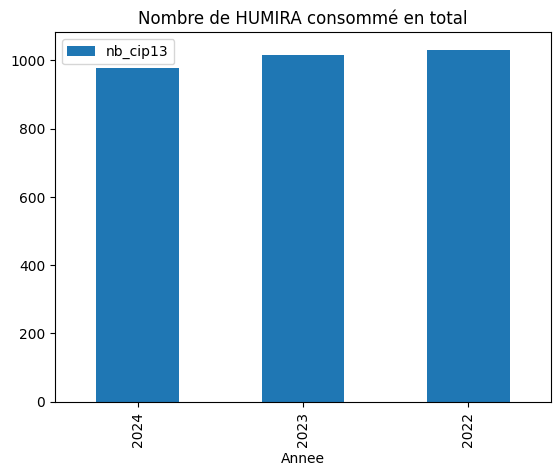

In [ ]:
#Query_1: Nombre de HUMIRA consommé en total

Query_1 = """
SELECT Annee, COUNT(l_cip13) as nb_cip13
FROM fichier_total
WHERE l_cip13 like ?
group by Annee
ORDER BY Annee desc
"""
resultat_1 = pd.read_sql_query(Query_1, base_total, params=['HUMIRA%'])
print(resultat_1)

#Graphique 1
resultat_1.plot(x='Annee', y='nb_cip13', kind='bar', title='Nombre de HUMIRA consommé en total')
plt.show()


   Annee  nb_humira_seringue  nb_humira_stylo
0   2024                 351              627
1   2023                 367              648
2   2022                 379              652


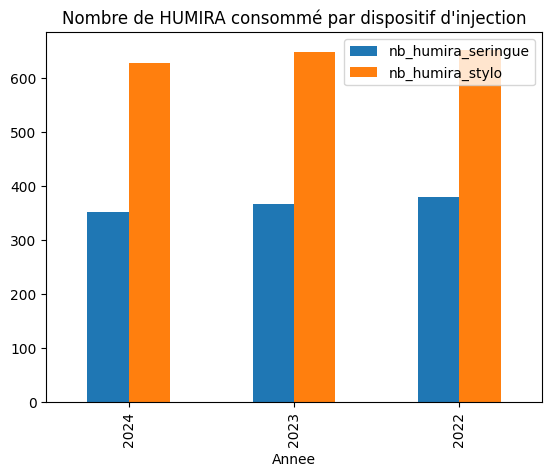

In [ ]:
#Query_2: Nombre de HUMIRA consommé par dispositif d'injection
Query_2 = """
SELECT Annee,
       SUM(CASE WHEN l_cip13 LIKE 'HUMIRA%SER%' THEN 1 ELSE 0 END) as nb_humira_seringue,
       SUM(CASE WHEN l_cip13 LIKE 'HUMIRA%STYLO%' THEN 1 ELSE 0 END) as nb_humira_stylo
FROM fichier_total
WHERE l_cip13 LIKE 'HUMIRA%'
group by Annee
ORDER BY Annee desc
"""
resultat_2 = pd.read_sql_query(Query_2, base_total)
print(resultat_2)

#Graphique 2
resultat_2.plot(x='Annee', y=['nb_humira_seringue', 'nb_humira_stylo'], kind='bar', title='Nombre de HUMIRA consommé par dispositif d\'injection')
plt.show()

Annee  2022  2023  2024
age                    
0       186   182   170
20      528   521   506
60      317   312   302


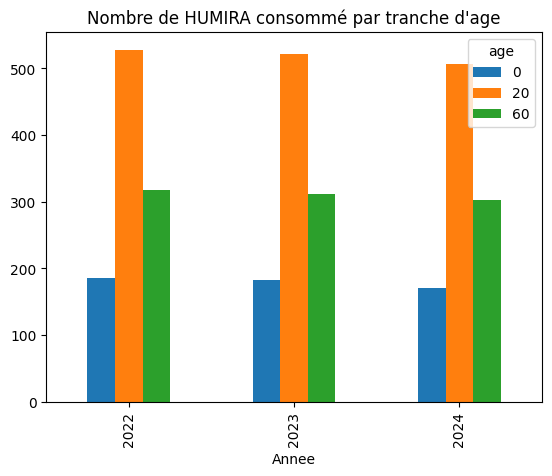

In [ ]:
#Query_3: Nombre de HUMIRA consommé par tranche d'age
Query_3 = """
SELECT Annee, age, COUNT(l_cip13) as nb_cip13
FROM fichier_total
WHERE l_cip13 like ?
group by Annee, age
ORDER BY Annee desc, age asc
"""
resultat_3 = pd.read_sql_query(Query_3, base_total, params=['HUMIRA%'])
resultat_3_pivot = resultat_3.pivot(index='age', columns='Annee', values='nb_cip13')
print(resultat_3_pivot)

#Graphique 3
resultat_3_pivot.T.plot(kind='bar', title='Nombre de HUMIRA consommé par tranche d\'age')
plt.show()


In [ ]:
#Query_4: Nombre de HUMIRA consommé par région
Query_4 = """
SELECT Annee, BEN_REG, COUNT(l_cip13) as nb_cip13
FROM fichier_total
WHERE l_cip13 like ?
group by Annee, BEN_REG
ORDER BY Annee desc, BEN_REG asc
"""
resultat_4 = pd.read_sql_query(Query_4, base_total, params=['HUMIRA%'])

resultat_4_pivot = resultat_4.pivot(index='BEN_REG', columns='Annee', values='nb_cip13')
print(resultat_4_pivot)

Annee    2022  2023  2024
BEN_REG                  
5          40    38    42
11        104   103   106
24         53    53    49
27         63    60    55
28         61    59    61
32         88    89    86
44         84    83    75
52         71    67    62
53         65    63    59
75         85    85    81
76         91    94    91
84         95    94    92
93        104   100    93
99         27    27    26


In [ ]:
#Query_5: Nombre de HUMIRA consommé par prescripteur
Query_5 = """
SELECT Annee, PSP_SPE, COUNT(l_cip13) as nb_cip13
FROM fichier_total
WHERE l_cip13 like ?
group by Annee, PSP_SPE
ORDER BY Annee desc, PSP_SPE asc
"""
resultat_5 = pd.read_sql_query(Query_5, base_total, params=['HUMIRA%'])
resultat_5_pivot = resultat_5.pivot(index='PSP_SPE', columns='Annee', values='nb_cip13')
print(resultat_5_pivot)

Annee     2022   2023   2024
PSP_SPE                     
1        110.0  109.0   97.0
3          1.0    1.0    NaN
4         12.0    9.0    4.0
5         50.0   50.0   53.0
6          5.0    3.0    NaN
7          3.0    5.0    1.0
8        189.0  169.0  157.0
9          6.0    6.0    6.0
12         5.0    7.0    6.0
14       115.0  111.0  107.0
15         4.0    2.0    4.0
90       324.0  316.0  325.0
99       207.0  227.0  218.0


In [ ]:
#Query_6: Nombre de HUMIRA consommé par dispositif d'injection, par tranche d'âge, par région, par prescripteur
Query_6 = """
SELECT Annee,
       age,
       BEN_REG,
       PSP_SPE,
       SUM(CASE WHEN l_cip13 LIKE 'HUMIRA%SER%' THEN 1 ELSE 0 END) as nb_humira_seringue,
       SUM(CASE WHEN l_cip13 LIKE 'HUMIRA%STYLO%' THEN 1 ELSE 0 END) as nb_humira_stylo
FROM fichier_total
WHERE l_cip13 like ?
GROUP BY Annee, age, BEN_REG, PSP_SPE
ORDER BY Annee desc, age asc, BEN_REG asc, PSP_SPE asc
"""
resultat_6 = pd.read_sql_query(Query_6, base_total, params=['HUMIRA%'])
resultat_6_pivot = resultat_6.pivot(index=['age', 'BEN_REG', 'PSP_SPE'], columns='Annee', values=['nb_humira_seringue', 'nb_humira_stylo'])
print(resultat_6_pivot)

                    nb_humira_seringue           nb_humira_stylo          
Annee                             2022 2023 2024            2022 2023 2024
age BEN_REG PSP_SPE                                                       
0   5       90                     0.0  0.0  1.0             2.0  2.0  2.0
            99                     1.0  0.0  0.0             1.0  1.0  1.0
    11      1                      0.0  0.0  NaN             1.0  1.0  NaN
            8                      0.0  0.0  0.0             2.0  2.0  2.0
            12                     0.0  0.0  0.0             1.0  2.0  2.0
...                                ...  ...  ...             ...  ...  ...
60  93      99                     3.0  4.0  3.0             5.0  6.0  4.0
    99      8                      2.0  1.0  1.0             2.0  2.0  2.0
            14                     1.0  NaN  NaN             0.0  NaN  NaN
            90                     4.0  3.0  4.0             2.0  2.0  2.0
            99           